B站：同济子豪兄（https://space.bilibili.com/1900783）

微信公众号：人工智能小技巧

张子豪 2021-07-12

# 定义可视化辅助函数

In [1]:
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 调用摄像头拍摄照片

In [8]:
# 导入opencv-python
import cv2
import time

# 获取摄像头，0为电脑默认摄像头，1为外接摄像头
cap = cv2.VideoCapture(0)

time.sleep(2) # 运行本代码后两秒拍照

# 从摄像头捕获一帧画面
success, image = cap.read()

# 关闭摄像头
cap.release()
# 关闭图像窗口
cv2.destroyAllWindows()

cv2.imwrite('camera_test.jpg', image)

True

In [3]:
image.shape

(480, 640, 3)

# 查看拍摄到的照片

In [4]:
import cv2
img = cv2.imread('camera_test.jpg')

In [5]:
img.shape

(480, 640, 3)

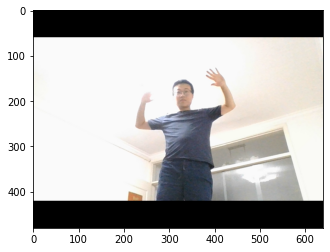

In [6]:
look_img(image)

# 调用摄像头拍摄视频

In [7]:
# 调用摄像头拍摄视频模板
# 生成的视频文件名默认为output_video.mp4，帧处理函数process_frame()默认不进行任何处理
# 同济子豪兄 2021-7-11

# 导入opencv-python
import cv2
import time

# 定义逐帧处理函数，可不进行任何处理，直接将摄像头捕获的画面写入视频帧
def process_frame(img):
    return img

output_name = 'record_video.mp4'

# 获取摄像头，传入0表示获取系统默认摄像头
cap = cv2.VideoCapture(0)

# 打开cap
cap.open(0)

frame_size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)

out = cv2.VideoWriter(output_name, fourcc, fps, (int(frame_size[0]), int(frame_size[1])))

# 无限循环，直到break被触发
while cap.isOpened():
    # 获取画面
    success, frame = cap.read()
    if not success:
        break
    
    # 对捕获的帧进行图像处理
    frame = process_frame(frame)
    
    ## 将帧写入视频文件中
    out.write(frame)
    
    # 展示处理后的三通道图像
    cv2.imshow('press q to break', frame)

    if cv2.waitKey(1) in [ord('q'),27]: # 按键盘上的q或esc退出（在英文输入法下）
        break
    
# 关闭图像窗口
cv2.destroyAllWindows()

out.release()

# 关闭摄像头
cap.release()

print('视频已保存', output_name)

视频已保存 record_video.mp4
